すべての枚数: 43
現在の枚数: 42


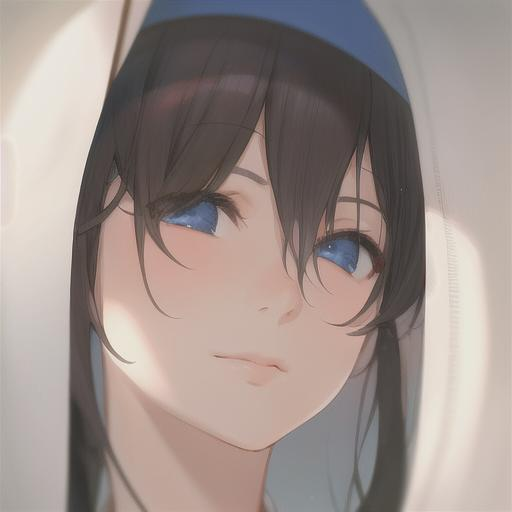

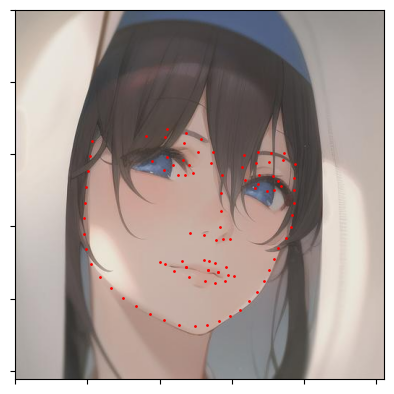

In [12]:

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

def create_directory_if_not_exists(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        
target_dataset = "counterfeit-v1.0_1"

csv_path = f"/root/dataset/SD_generated_dataset/{target_dataset}/annotations/annotations.csv"
dataset_img_path = f"/root/dataset/SD_generated_dataset/{target_dataset}/images"



annotation_save_path = f"/root/dataset/SD_generated_dataset_checked/{target_dataset}/annotations"
save_image_dir = f"/root/dataset/SD_generated_dataset_checked/{target_dataset}/images"
create_directory_if_not_exists(f"/root/dataset/SD_generated_dataset_checked/{target_dataset}")
create_directory_if_not_exists(f"/root/dataset/SD_generated_dataset_checked/{target_dataset}/annotations")
create_directory_if_not_exists(f"/root/dataset/SD_generated_dataset_checked/{target_dataset}/images")

not_annotation_save_path = f"/root/dataset/SD_generated_dataset_checked/not_selected_{target_dataset}/annotations"
not_save_image_dir = f"/root/dataset/SD_generated_dataset_checked/not_selected_{target_dataset}/images"
create_directory_if_not_exists(f"/root/dataset/SD_generated_dataset_checked/not_selected_{target_dataset}")
create_directory_if_not_exists(f"/root/dataset/SD_generated_dataset_checked/not_selected_{target_dataset}/annotations")
create_directory_if_not_exists(f"/root/dataset/SD_generated_dataset_checked/not_selected_{target_dataset}/images")

data = pd.read_csv(csv_path).values.tolist()

from scipy.interpolate import interp1d # scipyのモジュールを使う
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

def spline_interp(in_x, in_y):
    out_x = np.linspace(np.min(in_x), np.max(in_x), np.size(in_x)*100) # もとのxの個数より多いxを用意
    func_spline = interp1d(in_x, in_y, kind='cubic') # cubicは3次のスプライン曲線
    out_y = func_spline(out_x) # func_splineはscipyオリジナルの型

    return out_x, out_y

count = 0

for csv_row_num,image_landmark in enumerate(data):
    key_input=""
    count += 1
    print("すべての枚数:",len(data))
    print("現在の枚数:",count)
    try:
        fig, ax = plt.subplots(1)
        ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        image_name = image_landmark[0]
        x_coordinates = image_landmark[3::2]
        y_coordinates = image_landmark[4::2]
        x_np = np.array(x_coordinates)
        y_np = np.array(y_coordinates)
        img = Image.open(f"{dataset_img_path}/{image_name}")
        img.show()
        ax.imshow(img)
        plt.plot(x_np, y_np, 'o',color='red',markersize=1) # 上右眉
        plt.show()
        # time.sleep(1)
        
        # キー入力でデータセットとして利用可能か判断する
        key_input = input()
        
        if key_input == " ":
            # アノテーションデータの保存    
            with open(f"{annotation_save_path}/annotations.csv","a") as f:
                writer = csv.writer(f)
                writer.writerow(image_landmark)
            img.save(f"{save_image_dir}/{image_name}")
            
            del data[csv_row_num]
            with open(csv_path, 'w', newline='') as file:
                writer = csv.writer(file)
                writer.writerows(data)
            
            os.remove(f"{dataset_img_path}/{image_name}")
            clear_output(True)
        else:
            # アノテーションデータの保存    
            with open(f"{not_annotation_save_path}/annotations.csv","a") as f:
                writer = csv.writer(f)
                
                writer.writerow(image_landmark)
            img.save(f"{not_save_image_dir}/{image_name}")
            
            del data[csv_row_num]
            with open(csv_path, 'w', newline='') as file:
                writer = csv.writer(file)
                writer.writerows(data)
            
            os.remove(f"{dataset_img_path}/{image_name}")
            print("使用されませんでした")
            clear_output(True)
    except:
        continue
    if key_input == 'f':
        print("終了します")
        raise SystemExit
    
    clear_output(True)